In [113]:
import mwdsbe
import geopandas as gpd
import pandas as pd

In [114]:
registry = mwdsbe.load_registry() # geopandas df

In [115]:
registry.head()

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,mailing_state,mailing_zip,certification_type,capability,local,out_of_state,location_standard,lat,lng,geometry
registry_id,,,,,,,,,,,,,,,,,,,,
0,119 Degrees Architects,NaN,Rafael,Utrera,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,MBE,"NAICS 5413 Architectural, Engineering, and Rel...",True,False,1503 GREEN ST,39.964275,-75.163042,POINT (-75.16304 39.96427)
1,12Bravo Group,NaN,JEFFREY,YEKENCHIK,236 McKendimen Road,Medford Lakes,NJ,8055.0,236 McKendimen Road,Medford Lakes,NJ,8055.0,DSBE,"Addition, alteration and renovation for-sale b...",False,True,NaN,NaN,NaN,None
2,1st Choice Financial Group,ProVisio,Kathrina,Nease,133 N. 21st Street,Camp Hill,PA,17011.0,133 N. 21st Street,Camp Hill,PA,17011.0,WBE,NAICS 928120 International Affairs,False,False,NaN,NaN,NaN,None
3,212 Harakawa Inc.,Two Twelve,Ann,Harakawa,"236 W 27th Street, Suite 802",New York,NY,10001.0,"236 W 27th Street, Suite 802",New York,NY,10001.0,MWBE,Graphic Design Services; Graphic design servic...,False,True,NaN,NaN,NaN,None
4,215 Media Solutions,NaN,Dewain,Johnson,810 Felton Avenue,Sharon Hill,PA,19079.0,810 Felton Avenue,Sharon Hill,PA,19079.0,MBE,NAICS 5414 Specialized Design Services ; NAICS...,False,False,NaN,NaN,NaN,None


In [116]:
registry_geo = registry.dropna(subset=["geometry"])

In [117]:
registry_geo

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,mailing_state,mailing_zip,certification_type,capability,local,out_of_state,location_standard,lat,lng,geometry
registry_id,,,,,,,,,,,,,,,,,,,,
0,119 Degrees Architects,NaN,Rafael,Utrera,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,MBE,"NAICS 5413 Architectural, Engineering, and Rel...",True,False,1503 GREEN ST,39.964275,-75.163042,POINT (-75.16304 39.96427)
7,24 Hour Cleaning Services Ltd.,NaN,Mary Colleen,Zoltowski,14005 Barcalow Street,Philadelphia,PA,19116.0,14005 Barcalow Street,Philadelphia,PA,19116.0,WBE,Janitorial equipment and supplies merchant who...,True,False,14005 BARCALOW ST,40.131349,-75.014284,POINT (-75.01428 40.13135)
8,"259 Strategies, LLC",NaN,Chaka,"Fattah, Jr.","Two Logan Square, Suite 1900",Philadelphia,PA,19103.0,"Two Logan Square, Suite 1900",Philadelphia,PA,19103.0,MBE,"NAICS\t5416\tManagement, Scientific, and Techn...",True,False,100-20 N 18TH ST,39.955726,-75.169784,POINT (-75.16978 39.95573)
10,3rd Floor Media,NaN,Gary,Shepherd,"7544 Fayette Street, Suite 1F",Philadelphia,PA,19150.0,PO Box 2274,Bala Cynwyd,PA,19004.0,MBE,512240: Audio recording post-production servic...,True,False,7544 FAYETTE ST,40.069307,-75.160155,POINT (-75.16016 40.06931)
18,A & A Court Reporting,Andrea St. John,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106.0,"P.O. Box 74, Suite 4",Moorestown,NJ,8057.0,WBE,Court reporting and stenotype services,True,True,303 CHESTNUT ST,39.948849,-75.146173,POINT (-75.14617 39.94885)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,"Zanaras Reporting & Video, LLC",NaN,JULIE,ZANARAS,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103.0,"1845 WALNUT STREET, Suite 938",Philadelphia,PA,19103.0,WBE,Court reporting and stenotype services ; Court...,True,False,1845 WALNUT ST,39.950665,-75.171552,POINT (-75.17155 39.95067)
3109,"Zekeria Consulting, LLC",NaN,Zainen,Zekeria,"220 Locust Street, Unit 9C",Philadelphia,PA,19106.0,"220 Locust Street, Unit 9C",Philadelphia,PA,19106.0,MWBE,90101\tBusiness Consultant; 90108\tFinancial C...,True,False,220 LOCUST ST,39.944816,-75.145274,POINT (-75.14527 39.94482)
3112,Zimmerman Studio LLC,NaN,Pamela,Zimmerman,"1927 South Broad Street, First Floor",Philadelphia,PA,19148.0,"1927 South Broad Street, First Floor",Philadelphia,PA,19148.0,WBE,"5413 Architectural, Engineering, and Related S...",True,False,1927 S BROAD ST,39.926058,-75.168948,POINT (-75.16895 39.92606)


In [118]:
# add neighborhoods
zillow = gpd.read_file('data/neighborhood/zillow_neighborhoods.geojson')

In [124]:
with open("neighborhoods.json", "w") as ff:
        ff.write(zillow.to_json())

In [120]:
registry_gdf = gpd.GeoDataFrame(registry_geo, geometry='geometry', crs={"init": "epsg:4326"})
joined = gpd.sjoin(registry_gdf, zillow, op='within', how='left')

In [122]:
joined.head()

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,certification_type,capability,local,out_of_state,location_standard,lat,lng,geometry,index_right,ZillowName
0,119 Degrees Architects,NaN,Rafael,Utrera,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,"1503 Green Street, Suite # 4",Philadelphia,...,MBE,"NAICS 5413 Architectural, Engineering, and Rel...",True,False,1503 GREEN ST,39.964275,-75.163042,POINT (-75.16304 39.96427),125.0,Spring Garden
7,24 Hour Cleaning Services Ltd.,NaN,Mary Colleen,Zoltowski,14005 Barcalow Street,Philadelphia,PA,19116.0,14005 Barcalow Street,Philadelphia,...,WBE,Janitorial equipment and supplies merchant who...,True,False,14005 BARCALOW ST,40.131349,-75.014284,POINT (-75.01428 40.13135),123.0,Somerton
8,"259 Strategies, LLC",NaN,Chaka,"Fattah, Jr.","Two Logan Square, Suite 1900",Philadelphia,PA,19103.0,"Two Logan Square, Suite 1900",Philadelphia,...,MBE,"NAICS\t5416\tManagement, Scientific, and Techn...",True,False,100-20 N 18TH ST,39.955726,-75.169784,POINT (-75.16978 39.95573),73.0,Logan Square
10,3rd Floor Media,NaN,Gary,Shepherd,"7544 Fayette Street, Suite 1F",Philadelphia,PA,19150.0,PO Box 2274,Bala Cynwyd,...,MBE,512240: Audio recording post-production servic...,True,False,7544 FAYETTE ST,40.069307,-75.160155,POINT (-75.16016 40.06931),140.0,West Oak Lane
18,A & A Court Reporting,Andrea St. John,Andrea,St. John,"303 Chestnut Street, Second Floor",Philadelphia,PA,19106.0,"P.O. Box 74, Suite 4",Moorestown,...,WBE,Court reporting and stenotype services,True,True,303 CHESTNUT ST,39.948849,-75.146173,POINT (-75.14617 39.94885),97.0,Old City


In [125]:
totals = joined.groupby('ZillowName').size()
totals = totals.to_frame('N').reset_index()
totals.head()

,ZillowName,N
0,Airport,2
1,Allegheny West,6
2,Andorra,2
3,Aston Woodbridge,2
4,Bartram Village,1


In [126]:
totals = zillow.merge(totals, on='ZillowName', how='left')

In [128]:
totals['N'] = totals['N'].fillna(0)

In [129]:
totals

,ZillowName,geometry,N
0,Academy Gardens,"POLYGON ((-74.99851 40.06435, -74.99456 40.061...",0.0
1,Airport,"POLYGON ((-75.19728 39.89252, -75.19617 39.892...",2.0
2,Allegheny West,"POLYGON ((-75.16592 40.00327, -75.16596 40.003...",6.0
3,Andorra,"POLYGON ((-75.22463 40.06686, -75.22588 40.065...",2.0
4,Aston Woodbridge,"POLYGON ((-75.00860 40.05369, -75.00861 40.053...",2.0
...,...,...,...
153,Wister,"POLYGON ((-75.17210 40.03840, -75.17197 40.037...",4.0
154,Woodland Terrace,"POLYGON ((-75.20399 39.94968, -75.20396 39.949...",1.0
155,Wynnefield,"POLYGON ((-75.22070 40.00392, -75.21792 39.994...",6.0
156,Wynnefield Heights,"POLYGON ((-75.20103 40.00419, -75.20410 40.000...",7.0


In [130]:
with open("n_neighborhoods.json", "w") as ff:
        ff.write(totals.to_json())

In [98]:
import geopandas as gpd
MSA = gpd.read_file('./data/MSA')

In [100]:
MSA

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,31340,310M400US31340,31340,"Lynchburg, VA",M1,5491925729,68559452,"POLYGON ((-79.85840 37.26715, -79.85660 37.268..."
1,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7..."
2,None,24900,310M400US24900,24900,"Greenwood, MS",M2,3165909249,48172332,"POLYGON ((-90.45376 33.27625, -90.45310 33.328..."
3,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684..."
4,None,18260,310M400US18260,18260,"Cookeville, TN",M2,2960951070,35466926,"POLYGON ((-85.84648 36.28817, -85.83735 36.341..."
...,...,...,...,...,...,...,...,...,...
940,288,13060,310M400US13060,13060,"Bay City, TX",M2,2830586734,1345801267,"POLYGON ((-96.37833 28.39078, -96.36755 28.440..."
941,None,48300,310M400US48300,48300,"Wenatchee, WA",M1,12277658519,266186967,"POLYGON ((-121.18080 47.89849, -121.17723 47.9..."
942,314,35460,310M400US35460,35460,"Newport, TN",M2,1128782873,18734377,"POLYGON ((-83.31519 35.89332, -83.31078 35.895..."
943,408,45860,310M400US45860,45860,"Torrington, CT",M2,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."


In [104]:
Philly_MSA = MSA.loc[MSA['NAME'].str.contains('Philadelphia-Camden-Wilmington')]

In [105]:
Philly_MSA

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
379,428,37980,310M400US37980,37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",M1,11921840711,692432936,"MULTIPOLYGON (((-75.41272 39.38437, -75.41130 ..."


In [106]:
from matplotlib import pyplot as plt

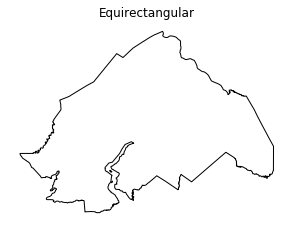

In [107]:
fig, ax = plt.subplots(figsize=(5, 5))
Philly_MSA.to_crs(epsg=4326).plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_title("Equirectangular")
ax.set_axis_off()
ax.set_aspect("equal")

In [110]:
with open("Philly_MSA.json", "w") as ff:
        ff.write(Philly_MSA.to_json())

In [112]:
registry

,company_name,dba_name,owner_first,owner_last,location,location_city,location_state,zip_code,mailing_address,mailing_city,...,mailing_zip,certification_type,capability,local,out_of_state,location_standard,lat,lng,geometry,id
registry_id,,,,,,,,,,,,,,,,,,,,,
0,119 Degrees Architects,NaN,Rafael,Utrera,"1503 Green Street, Suite # 4",Philadelphia,PA,19130.0,"1503 Green Street, Suite # 4",Philadelphia,...,19130.0,MBE,"NAICS 5413 Architectural, Engineering, and Rel...",True,False,1503 GREEN ST,39.964275,-75.163042,POINT (-75.16304 39.96427),0
1,12Bravo Group,NaN,JEFFREY,YEKENCHIK,236 McKendimen Road,Medford Lakes,NJ,8055.0,236 McKendimen Road,Medford Lakes,...,8055.0,DSBE,"Addition, alteration and renovation for-sale b...",False,True,NaN,NaN,NaN,None,1
2,1st Choice Financial Group,ProVisio,Kathrina,Nease,133 N. 21st Street,Camp Hill,PA,17011.0,133 N. 21st Street,Camp Hill,...,17011.0,WBE,NAICS 928120 International Affairs,False,False,NaN,NaN,NaN,None,2
3,212 Harakawa Inc.,Two Twelve,Ann,Harakawa,"236 W 27th Street, Suite 802",New York,NY,10001.0,"236 W 27th Street, Suite 802",New York,...,10001.0,MWBE,Graphic Design Services; Graphic design servic...,False,True,NaN,NaN,NaN,None,3
4,215 Media Solutions,NaN,Dewain,Johnson,810 Felton Avenue,Sharon Hill,PA,19079.0,810 Felton Avenue,Sharon Hill,...,19079.0,MBE,NAICS 5414 Specialized Design Services ; NAICS...,False,False,NaN,NaN,NaN,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,Zoeza Group,NaN,Jason,Wingard,"536 W. Moreland Avenue, Suite C.",Philadelphia,PA,19118.0,"536 W. Moreland Avenue, Suite C.",Philadelphia,...,19118.0,MBE,90124\tResearch Consulting; 90113\tTraining Co...,True,False,536 W MORELAND AVE,40.059613,-75.207085,POINT (-75.20708 40.05961),3114
3115,"ZONES, LLC",NaN,Mr.,Lalji,1102 15TH ST SW,Auburn,WA,98001.0,1102 15TH ST SW,Auburn,...,98001.0,MBE,42710\tCOMPUTER EQUIPMENT & PERIPHERALS- NEW;,False,True,NaN,NaN,NaN,None,3115
3116,Zook Motors Inc.,NaN,Susan,Wilson,25 Willow Run Drive,Kane,PA,16735.0,25 Willow Run Drive,Kane,...,16735.0,WBE,26005\tTIRE CHANGING & REPAIRS; 25074\tTOWING ...,False,False,NaN,NaN,NaN,None,3116
